<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/7week/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/7주차/cifar10_data'

os.makedirs(DATA_DIR, exist_ok=True)

cifar10_path = os.path.join(DATA_DIR,'cifar-10-batches-py')

if os.path.exists(cifar10_path):
    print(f"✓ 기존 데이터 발견: {cifar10_path}")
    print("저장된 데이터를 로드합니다...")
else:
    print(f"데이터가 없습니다. {DATA_DIR}에 다운로드합니다...")

데이터가 없습니다. /content/drive/MyDrive/Colab Notebooks/7주차/cifar10_data에 다운로드합니다...


In [46]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"✓ 데이터 로드 완료")
print(f"  - 학습 데이터: {x_train.shape}")
print(f"  - 테스트 데이터: {x_test.shape}\n")

✓ 데이터 로드 완료
  - 학습 데이터: (50000, 32, 32, 3)
  - 테스트 데이터: (10000, 32, 32, 3)



In [47]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [48]:
selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c)for c in selected_classes]

In [49]:
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

print(f"선택된 클래스: {selected_classes}")
print(f"  - 학습 샘플 수: {len(x_train)}")
print(f"  - 테스트 샘플 수: {len(x_test)}\n")

선택된 클래스: ['cat', 'dog', 'horse']
  - 학습 샘플 수: 15000
  - 테스트 샘플 수: 3000



In [50]:
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)]for y in y_train])
y_test = np.array([label_map[int(y)]for y in y_test])

x_train, x_test = x_train / 255.0, x_test / 255.0

/tmp/ipython-input-1342323737.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)]for y in y_train])
/tmp/ipython-input-1342323737.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)]for y in y_test])


In [51]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(x_train, y_train, epochs=15, validation_split=0.1, batch_size=128, verbose=2)

Epoch 1/15
106/106 - 7s - 63ms/step - accuracy: 0.5439 - loss: 0.9128 - val_accuracy: 0.6187 - val_loss: 0.8359
Epoch 2/15
106/106 - 1s - 7ms/step - accuracy: 0.6493 - loss: 0.7576 - val_accuracy: 0.6813 - val_loss: 0.7107
Epoch 3/15
106/106 - 1s - 6ms/step - accuracy: 0.6907 - loss: 0.6826 - val_accuracy: 0.7167 - val_loss: 0.6595
Epoch 4/15
106/106 - 1s - 6ms/step - accuracy: 0.7250 - loss: 0.6248 - val_accuracy: 0.6933 - val_loss: 0.6809
Epoch 5/15
106/106 - 1s - 6ms/step - accuracy: 0.7533 - loss: 0.5688 - val_accuracy: 0.7133 - val_loss: 0.6647
Epoch 6/15
106/106 - 1s - 6ms/step - accuracy: 0.7679 - loss: 0.5388 - val_accuracy: 0.6973 - val_loss: 0.6878
Epoch 7/15
106/106 - 1s - 6ms/step - accuracy: 0.7878 - loss: 0.4990 - val_accuracy: 0.7207 - val_loss: 0.6945
Epoch 8/15
106/106 - 1s - 6ms/step - accuracy: 0.8053 - loss: 0.4622 - val_accuracy: 0.7413 - val_loss: 0.6420
Epoch 9/15
106/106 - 1s - 6ms/step - accuracy: 0.8271 - loss: 0.4224 - val_accuracy: 0.7493 - val_loss: 0.6298


In [53]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"테스트 정확도: {test_acc:.4f}")

y_pred = np.argmax(model.predict(x_test), axis=1)

테스트 정확도: 0.7493
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


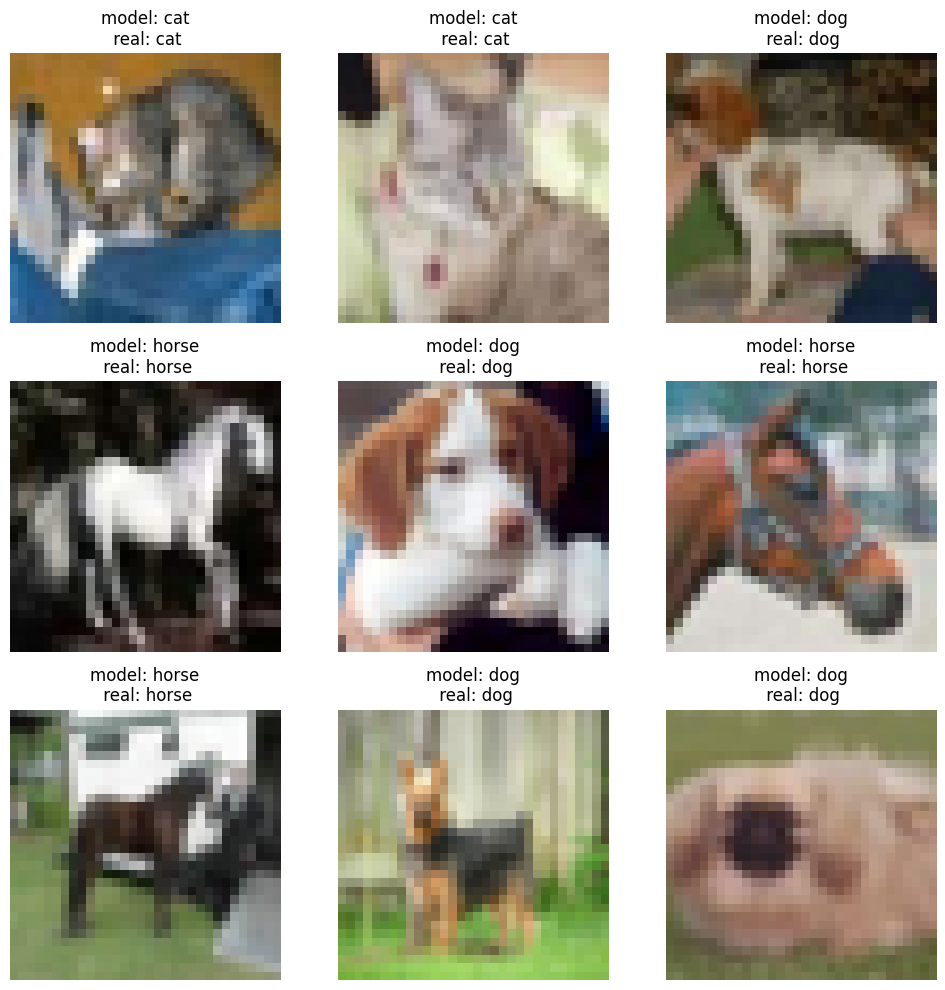

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"model: {selected_classes[y_pred[i]]}\n real: {selected_classes[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()